
<font size="5">Importing The Libs</font>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



<font size="5">Importing THe Dataset</font>

In [2]:

df = pd.read_csv('CarPrice_Assignment.csv')



<font size="5">EDAs</font>

In [187]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [188]:
df.shape

(205, 26)

In [189]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [191]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [192]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [193]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

for col in categorical_columns:

    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


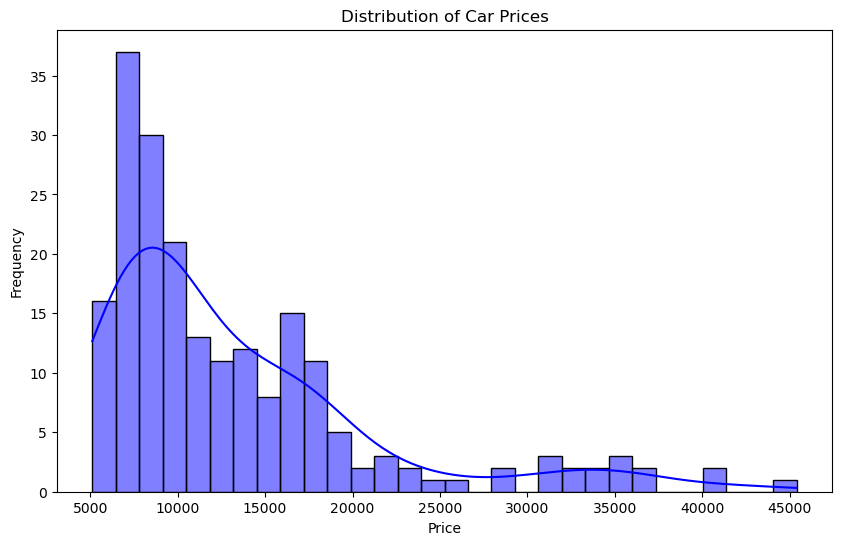

In [194]:
#distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


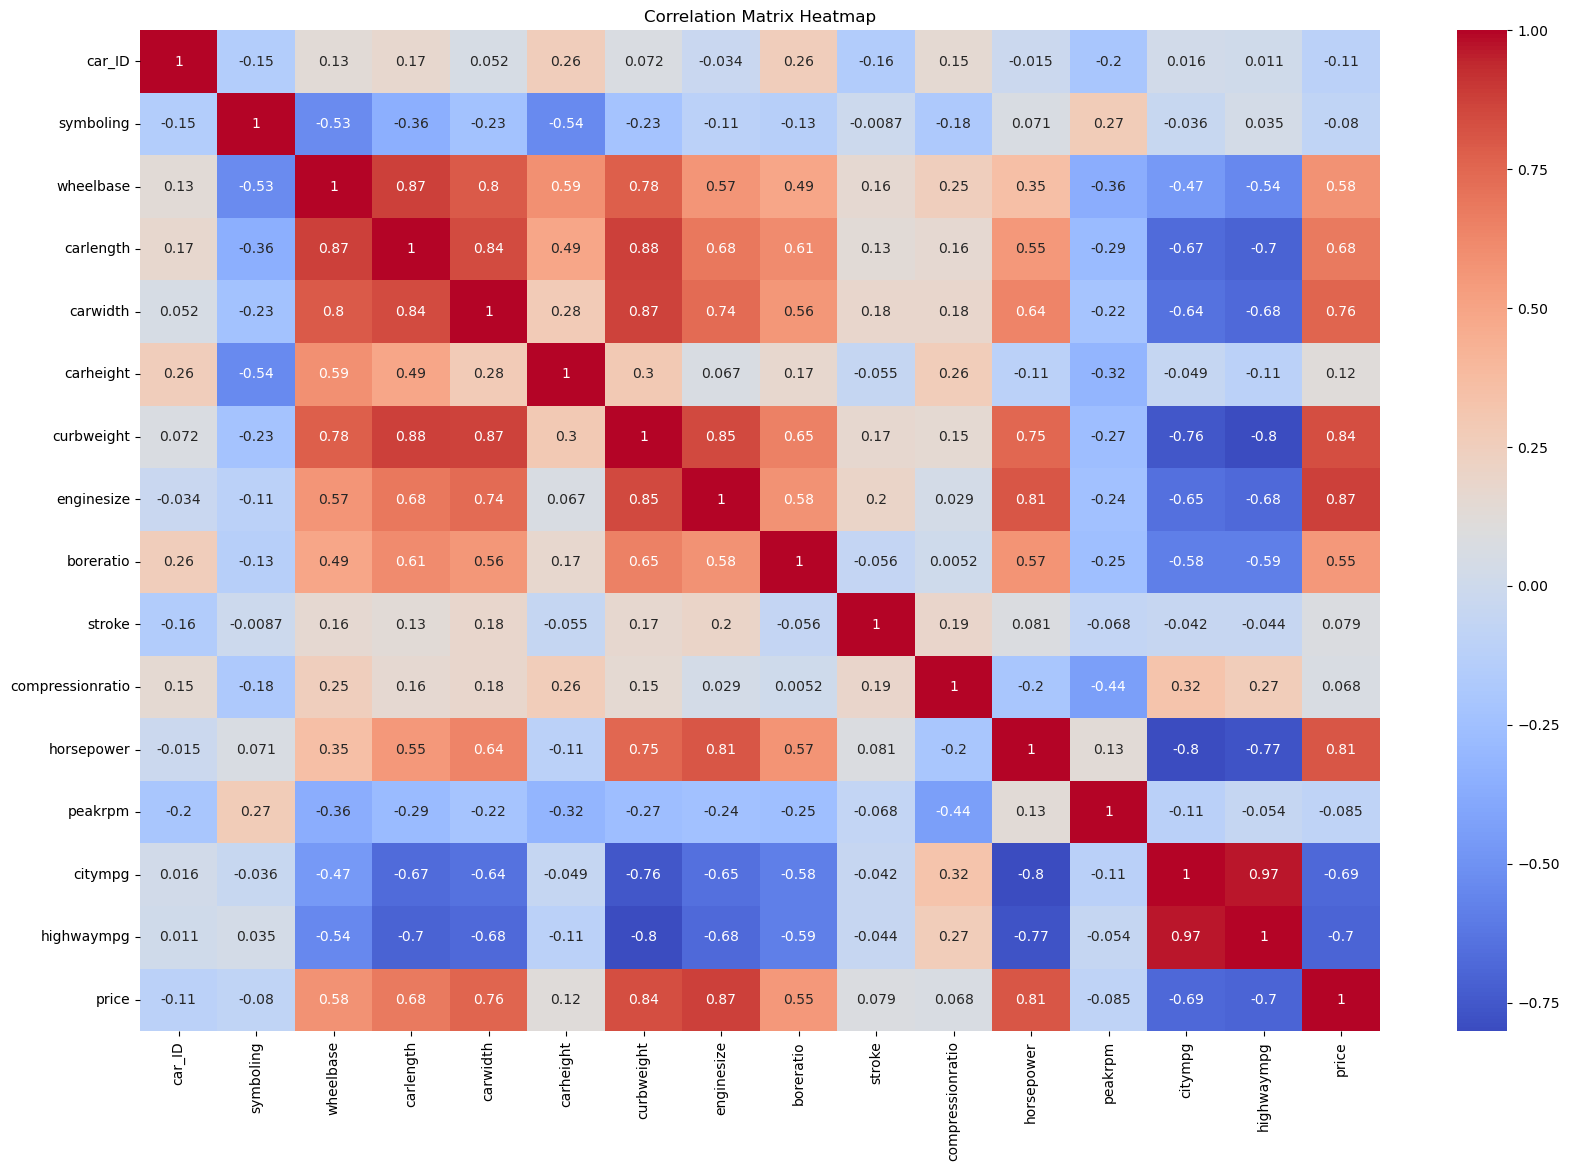

In [195]:
# Compute the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correation Matrix Heatmap')
plt.show()


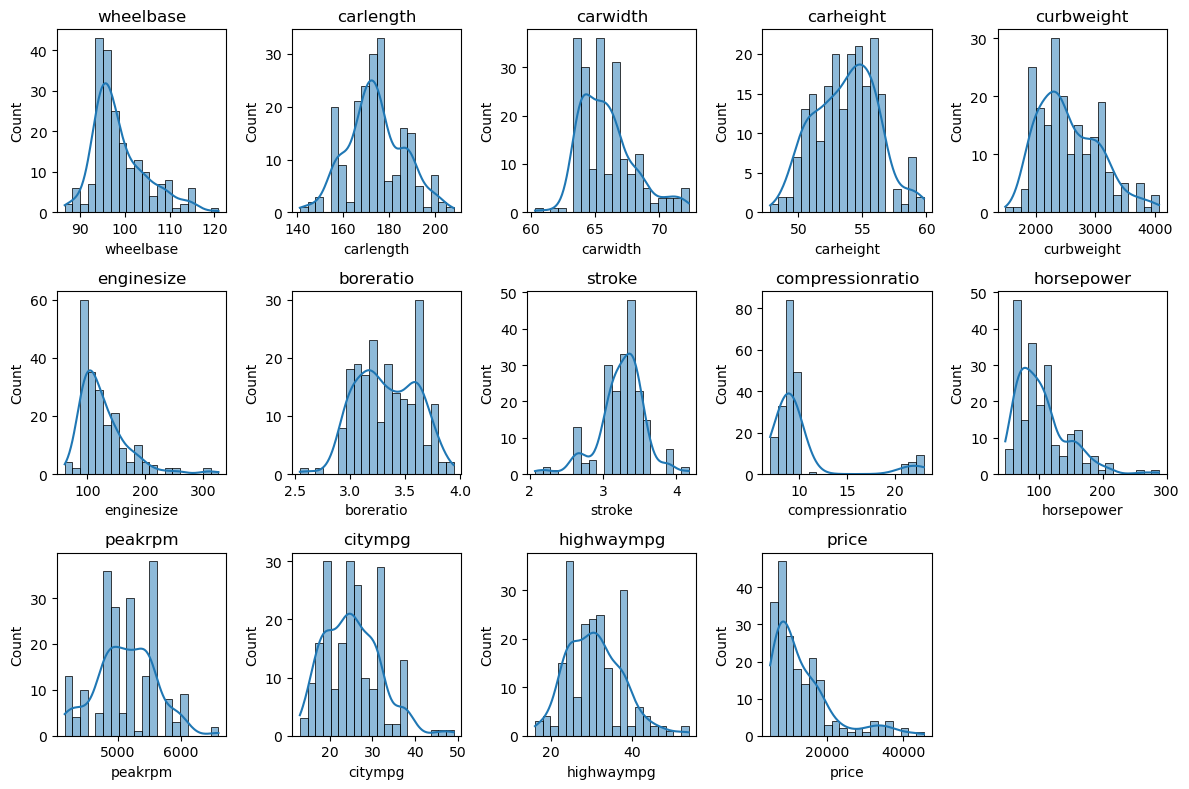

In [196]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

<font size="5">Data PreProcessing</font>

In [197]:
# Drop car_ID 
df.drop(['car_ID'], axis=1, inplace=True)
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.drop(['CarName'], axis=1, inplace=True)
df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [198]:
print(df['doornumber'].unique())
print(df['cylindernumber'].unique())


['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [199]:
from sklearn.preprocessing import LabelEncoder
# Mapping the doornumber and cylindernumber to integers
door_mapping = {
    'two': 2,
    'four': 4
}

cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['doornumber'] = df['doornumber'].map(door_mapping)
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

# Identify the categorical and numerical columns
categorical_columns = []
numeric_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numeric_columns.append(col)

print("Categorical Columns:", categorical_columns)
print("Numeric Columns:", numeric_columns)

# Label Encoding the categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print(df.head())


Categorical Columns: ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'brand']
Numeric Columns: ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           2        0           2   
1          3         1           0           2        0           2   
2          1         1           0           2        2           2   
3          2         1           0           4        3           1   
4          2         1           0           4        3           0   

   enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0               0       88.6      168.8      64.1       48.8        2548   
1               0       88.6      168.8      64.1

<font size = "5">Test-Train Splitting </font>

In [200]:

y = df['price']
X = df.drop('price', axis=1)

#80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (164, 24)
X_test shape: (41, 24)
y_train shape: (164,)
y_test shape: (41,)


<font size = "5"> Feature Scaling</font>

In [201]:
# We will use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])


[[-0.72738032 -3.15171911 -0.46348119  0.91798509  0.45721393  1.19131812
  -0.13650473  1.03708546  0.07244984  0.08381686  0.27677891  0.28128677
   0.04963143 -0.35247935  0.18801047 -0.13609459  0.4058361   1.21510088
   3.09986047 -0.81538553 -1.91782869  0.96431609  1.3135007  -0.45585288]
 [-0.72738032  0.31728716 -0.46348119  0.91798509  0.45721393  1.19131812
  -0.13650473  1.54123134  1.04391556  1.17026768  1.20726917  1.01604452
  -0.85476353 -0.35247935 -0.15899277  0.85588374  0.51738434 -3.36016616
  -0.43959084 -0.24189416 -0.292907   -0.98812636 -1.02456857  0.08198793]
 [-0.72738032  0.31728716 -0.46348119  0.91798509  1.61079985 -0.63462741
  -0.13650473 -0.50896191 -0.36761583 -1.09710795  2.17821552 -0.54164191
   0.04963143 -0.35247935 -0.85299925 -1.12807291 -1.00710835 -0.70966663
  -0.28343858 -1.0647296  -0.69913742  0.96431609  1.00175813  1.02320934]
 [ 0.07863571  0.31728716 -0.46348119  0.91798509  0.45721393 -0.63462741
  -0.13650473 -0.71062026 -0.732953

<font size ="5">Model Evalutaion</font>

We will be using LinearRegression RandomForestRegressor and XGBRegressor to see which one is better

In [202]:
# Defined a function to evaluate the model for not doing the same thing over and over again
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R² Score: {r2:.2f}')
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices ({model.__class__.__name__})')
    plt.show()


<font size ="4">Training Lineer Regression</font>

Linear Regression Performance:
RMSE: 3475.90
MAE: 2102.01
R² Score: 0.85


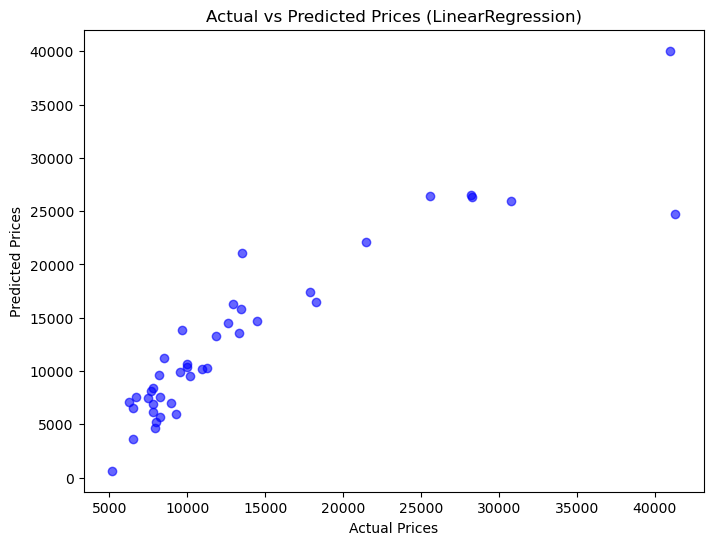

In [203]:

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("Linear Regression Performance:")
evaluate_model(lr_model, X_test, y_test)


<font size ="4">Training Random Forest</font>

Random Forest Performance:
RMSE: 1855.76
MAE: 1304.89
R² Score: 0.96


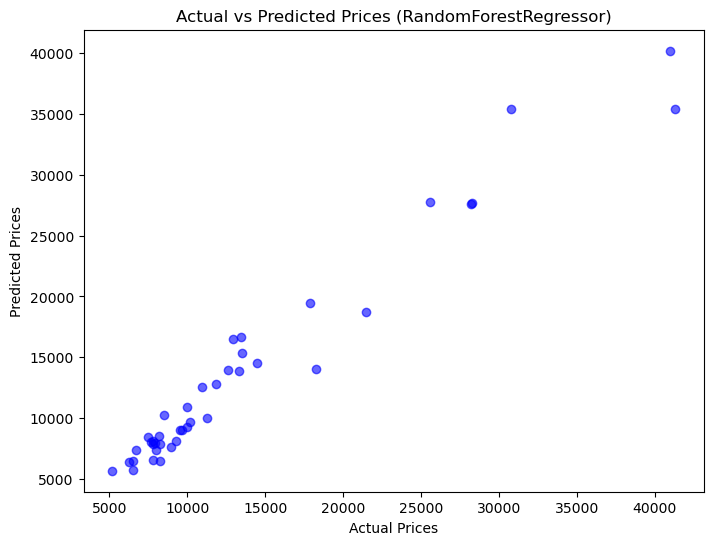

In [204]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest Performance:")
evaluate_model(rf_model, X_test, y_test)


<font size ="4">Training XGBoost</font>

XGBoost Performance:
RMSE: 2385.04
MAE: 1682.92
R² Score: 0.93


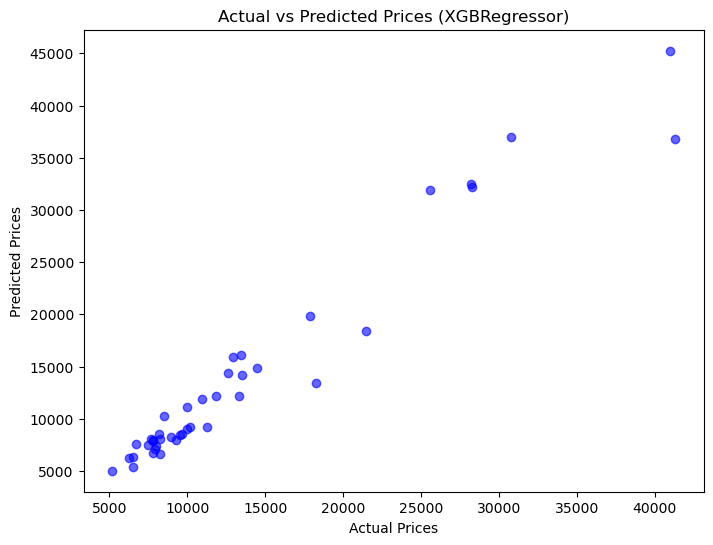

In [205]:

xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

print("XGBoost Performance:")
evaluate_model(xgb_model, X_test, y_test)


After the three of the regressors random forest is the most efficient one

<font size = "5">Hyperparameter Tuning using GridSearch</font>

In [206]:

param_grid = {
    'n_estimators': [100, 200, 300],         
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]             
}


In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                          
    n_jobs=-1,                     
    verbose=2,                    
    scoring='neg_mean_squared_error'  
)


In [208]:

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [209]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [210]:

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')


RMSE: 1861.35
MAE: 1297.17
R² Score: 0.96


C:\Users\mduma\AppData\Local\Temp\ipykernel_47876\2822864296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


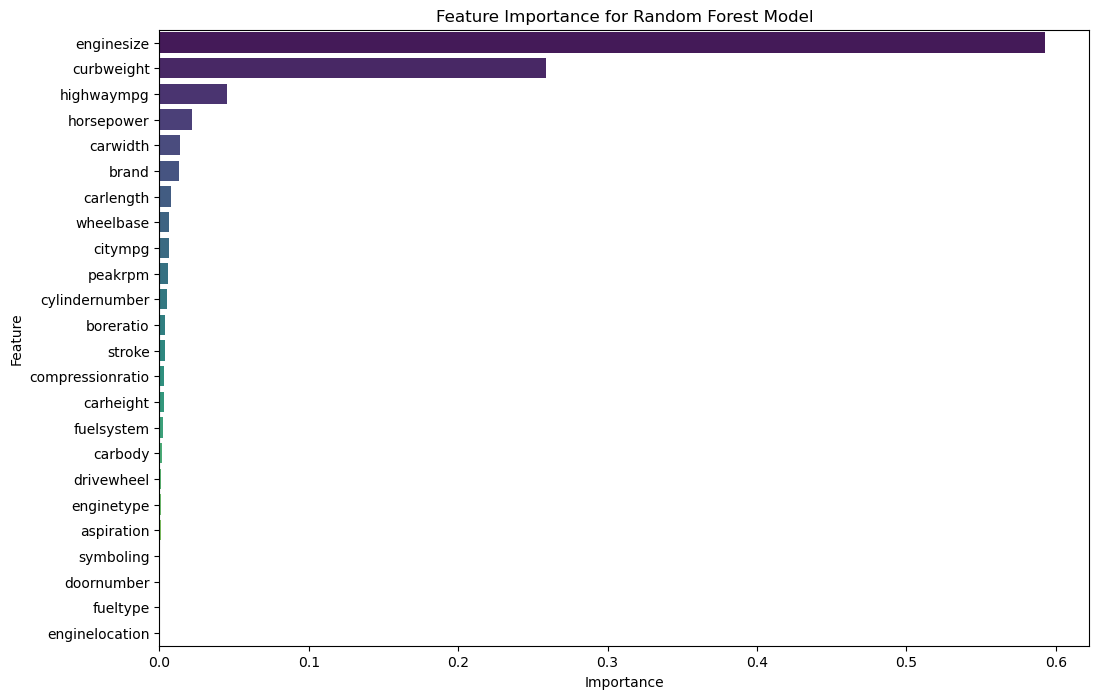

In [211]:

best_rf_model = grid_search.best_estimator_

importances = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Random Forest Model')
plt.show()
